In [31]:
import numpy as np
datas = []#2차원 리스트
f = open('Untitled.txt', 'r')
while True:
    s = f.readline() #s:'1,aaa,67,87,56\n'
    if s=='':
        break
    k = s.split('\n') #s:'1,aaa,67,87,56' : ''
    s = k[0]
    stu = s.split(',')  #stu: ['1', 'aaa', '67', '87', '56']
    for i in range(0, 2):
        stu.append(0)#stu: ['1', 'aaa', '67', '87', '56', 0 , 0]
    datas.append(stu)
    
f.close()

arr = np.array(datas) #datas리스트를 numpy 배열로 변환
names = arr[:, 0]  #모든 줄 0번컬럼(이름)만 추출하여 names에 저장
x = arr[:, 1:]  #모든 줄 1~끝컬럼(번호,국,영,수) 추출해서 x에 저장
score = x.astype(np.float32)  #점수 배열 요소 타입을 float으로 변경
'''
for i in score:        # 모든 줄의 총점 평균 계산. 
    k = i[1:4]           #k: [국,영,수]
    sum1 = k.sum()
    i[4]=sum1
    i[5]=sum1/3
'''    
score[:, 4]=score[:,1:4].sum(axis=1)
score[:, 5]=score[:, 4]/3

print('각 학생의 총점 평균')
for i in range(0, 5):
    print(names[i], end='\t')
    print(score[i])

#학생들의 국어총점, 영어총점, 수학총점
sums = score.sum(axis=0)
print('국어총점:', sums[1])
print('영어총점:', sums[2])
print('수학총점:', sums[3])
print('전체총점:', sums[4])
print('전체평균합:', sums[5])

#총점 정렬
#score[:, 4].sort(): 총점방만 정렬

#버블소트
for i in range(0, 4):
    for j in range(0, 4-i):
        if score[j][4]<score[j+1][4]:
            #score 배열 교체
            for k in range(0, len(score[j])):
                tmp = score[j][k]
                score[j][k]=score[j+1][k]
                score[j+1][k]=tmp
              
            #이름 바꿈
            tmp = names[j]
            names[j]=names[j+1]
            names[j+1]=tmp
            
for i in range(0, 5):
    print(names[i], end='\t')
    print(score[i])

각 학생의 총점 평균
aaa	[  1.  67.  87.  56. 210.  70.]
bbb	[  2.  65.  45.  34. 144.  48.]
ccc	[  3.        87.        65.        54.       206.        68.666664]
ddd	[  4.  98.  87.  76. 261.  87.]
eee	[  5.        54.        65.        87.       206.        68.666664]
국어총점: 371.0
영어총점: 349.0
수학총점: 307.0
전체총점: 1027.0
전체평균합: 342.3333
ddd	[  4.  98.  87.  76. 261.  87.]
aaa	[  1.  67.  87.  56. 210.  70.]
ccc	[  3.        87.        65.        54.       206.        68.666664]
eee	[  5.        54.        65.        87.       206.        68.666664]
bbb	[  2.  65.  45.  34. 144.  48.]


In [8]:
names

array(['aaa', 'bbb', 'ccc', 'ddd', 'eee'], dtype='<U11')

In [32]:
a = np.arange(5)
a

array([0, 1, 2, 3, 4])

In [33]:
a>1

array([False, False,  True,  True,  True])

In [34]:
a<4

array([ True,  True,  True,  True, False])

In [36]:
a

array([0, 1, 2, 3, 4])

In [35]:
a<1

array([ True, False, False, False, False])

In [37]:
a>3

array([False, False, False, False,  True])

In [1]:
import pandas as pd
s1 = pd.Series(['aaa', 'bbb', 'ccc'])
s1

0    aaa
1    bbb
2    ccc
dtype: object

In [2]:
s1[0]

'aaa'

In [3]:
s1[1:3]

1    bbb
2    ccc
dtype: object

In [4]:
s2 = pd.Series({'kor':65, 'eng':78, 'math':89})
s2

kor     65
eng     78
math    89
dtype: int64

In [5]:
s2['kor']

65

In [6]:
s2['math']

89

In [15]:
idx = [] #사용할 인덱스 
vals = [] #시리즈로 생성할 값 

#학생들 이름 리스트
names = ['aaa', 'bbb', 'ccc', 'ddd', 'eee']

for i in range(0, 5):#인덱스와 성적 자동 생성
    s = 'student'+str(i+1)  #인덱스로 사용할 문자열 생성
    idx.append(s) #생성한 인덱스를 idx에 저장
    
    #한사람의 이름과 성적을 한 리스트에 담음
    val =[names[i], np.random.randint(0,100, (3))]
    vals.append(val)
    
stu = pd.Series(vals, index=idx)
stu

student1    [aaa, [34, 95, 18]]
student2    [bbb, [52, 85, 25]]
student3     [ccc, [13, 54, 8]]
student4      [ddd, [6, 0, 20]]
student5    [eee, [16, 38, 45]]
dtype: object

In [9]:
idx

['student1', 'student2', 'student3', 'student4', 'student5']

In [10]:
vals

[array([80,  8, 39]),
 array([ 0, 94, 55]),
 array([55, 67, 52]),
 array([30, 86, 37]),
 array([87, 59, 24])]

In [16]:
data=[[1,2,3],[4,5,6],[7,8,9]]
d1 = pd.DataFrame(data)
d1

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


In [17]:
index = ['stu1','stu2','stu3','stu4']
cols = ['name' ,'num', 'kor', 'eng', 'math']
vals = [['aaa', 1, 54,56,67],
        ['bbb', 2, 98,76,56],
        ['ccc', 3, 78,89,54], 
        ['ddd', 4, 96,35,86]]
d2 = pd.DataFrame(vals, index=index, columns=cols)
d2

,name,num,kor,eng,math
stu1,aaa,1,54,56,67
stu2,bbb,2,98,76,56
stu3,ccc,3,78,89,54
stu4,ddd,4,96,35,86


In [18]:
d2.index

Index(['stu1', 'stu2', 'stu3', 'stu4'], dtype='object')

In [19]:
d2.columns

Index(['name', 'num', 'kor', 'eng', 'math'], dtype='object')

In [20]:
d2.values

array([['aaa', 1, 54, 56, 67],
       ['bbb', 2, 98, 76, 56],
       ['ccc', 3, 78, 89, 54],
       ['ddd', 4, 96, 35, 86]], dtype=object)

In [22]:
dic = {
    'name':['aaa','bbb','ccc','ddd'],
    'num':[1,2,3,4],
    'kor':[76,56,87,76],
    'eng':[89,56,45,78],
    'math':[98,56,43,23]
}
idx = np.arange(1, 5)
d3 = pd.DataFrame(dic, index=idx)
d3

,name,num,kor,eng,math
1,aaa,1,76,89,98
2,bbb,2,56,56,56
3,ccc,3,87,45,43
4,ddd,4,76,78,23


In [55]:
import pandas as pd
data = pd.read_csv('c.csv', encoding='euc-kr')
data

,발생년,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,2015,232035,4621,92522,233646,24232
1,2016,220917,4292,82463,226283,22974
2,2017,216335,4185,78212,223200,21417
3,2018,217148,3781,74258,227511,21268
4,2019,229600,3349,72306,245524,23882


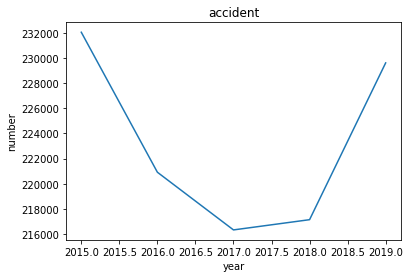

In [61]:
import matplotlib.pyplot as plt
x = data['발생년']
y = data['사고건수']
plt.plot(x, y)
plt.title('accident')
plt.xlabel('year')
plt.ylabel('number')
plt.show()

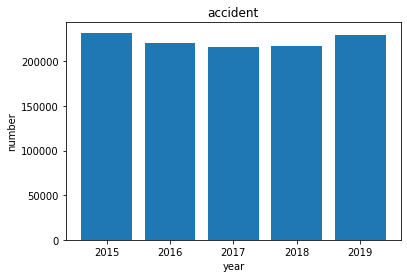

In [62]:
x = data['발생년']
y = data['사고건수']
idx = data.index
plt.bar(idx, y)
plt.xticks(idx, x)
plt.title('accident')
plt.xlabel('year')
plt.ylabel('number')
plt.show()

In [27]:
data.describe()

,발생년,사고건수,사망자수,중상자수,경상자수,부상신고자수
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,2017.000000,223207.000000,4045.600000,79952.200000,231232.800000,22754.600000
std,1.581139,7210.825161,491.552439,8034.621534,8845.056851,1369.400526
min,2015.000000,216335.000000,3349.000000,72306.000000,223200.000000,21268.000000
25%,2016.000000,217148.000000,3781.000000,74258.000000,226283.000000,21417.000000
50%,2017.000000,220917.000000,4185.000000,78212.000000,227511.000000,22974.000000
75%,2018.000000,229600.000000,4292.000000,82463.000000,233646.000000,23882.000000
max,2019.000000,232035.000000,4621.000000,92522.000000,245524.000000,24232.000000


In [13]:
data = pd.read_csv('d.csv', encoding='euc-kr')
data

,가해자연령층,월,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,20세이하,1,423,10,134,371,88
1,20세이하,2,405,6,128,397,81
2,20세이하,3,569,13,197,535,97
3,20세이하,4,595,11,175,578,117
4,20세이하,5,714,9,210,661,142
...,...,...,...,...,...,...,...
91,불명,8,318,0,44,234,91
92,불명,9,376,0,50,237,125
93,불명,10,391,0,65,277,90
94,불명,11,432,0,53,331,99


In [72]:
data.index

RangeIndex(start=0, stop=96, step=1)

In [76]:
data.columns

Index(['가해자연령층', '월', '사고건수', '사망자수', '중상자수', '경상자수', '부상신고자수'], dtype='object')

In [74]:
data.values

array([['20세이하', 1, 423, 10, 134, 371, 88],
       ['20세이하', 2, 405, 6, 128, 397, 81],
       ['20세이하', 3, 569, 13, 197, 535, 97],
       ['20세이하', 4, 595, 11, 175, 578, 117],
       ['20세이하', 5, 714, 9, 210, 661, 142],
       ['20세이하', 6, 722, 5, 208, 661, 148],
       ['20세이하', 7, 706, 6, 229, 647, 157],
       ['20세이하', 8, 649, 3, 197, 614, 131],
       ['20세이하', 9, 634, 6, 196, 580, 111],
       ['20세이하', 10, 675, 9, 197, 647, 145],
       ['20세이하', 11, 645, 11, 203, 611, 136],
       ['20세이하', 12, 494, 6, 153, 502, 104],
       ['21-30세', 1, 2177, 31, 694, 2340, 239],
       ['21-30세', 2, 2012, 30, 646, 2399, 197],
       ['21-30세', 3, 2439, 19, 771, 2791, 224],
       ['21-30세', 4, 2548, 29, 838, 2879, 264],
       ['21-30세', 5, 2850, 35, 914, 3243, 332],
       ['21-30세', 6, 2551, 27, 856, 2749, 331],
       ['21-30세', 7, 2588, 23, 788, 2883, 340],
       ['21-30세', 8, 2741, 30, 838, 3103, 332],
       ['21-30세', 9, 2527, 35, 765, 2916, 315],
       ['21-30세', 10, 2883, 44, 876,

In [15]:
len(data)

96

In [25]:
#배열명[컬럼명]
#배열명.loc[인덱스명]
#a = data[data.columns[1:]].loc[:11]#원하는 요소만 추출
tabs = []
idx = ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']
cnt = len(data)//12
for i in range(0, cnt):
    y = i*12
    title = data['가해자연령층'][y]
    vals = data[data.columns[2:]].loc[y:y+11]
    cols=[[title,title,title,title,title], data.columns[2:]]
    x = pd.DataFrame(vals.values, columns=cols, index=idx)
    tabs.append(x)

In [27]:
res = tabs[0]
for i in range(1, len(tabs)):
    res = res.join(tabs[i])

res

20세이하                       21-30세                         ... 65세이상       \
     사고건수 사망자수 중상자수 경상자수 부상신고자수   사고건수 사망자수 중상자수  경상자수 부상신고자수  ...  사고건수 사망자수   
1월    423   10  134  371     88   2177   31  694  2340    239  ...  2295   67   
2월    405    6  128  397     81   2012   30  646  2399    197  ...  1970   34   
3월    569   13  197  535     97   2439   19  771  2791    224  ...  2499   55   
4월    595   11  175  578    117   2548   29  838  2879    264  ...  2744   73   
5월    714    9  210  661    142   2850   35  914  3243    332  ...  3000   66   
6월    722    5  208  661    148   2551   27  856  2749    331  ...  2692   66   
7월    706    6  229  647    157   2588   23  788  2883    340  ...  2710   61   
8월    649    3  197  614    131   2741   30  838  3103    332  ...  3027   65   
9월    634    6  196  580    111   2527   35  765  2916    315  ...  2856   73   
10월   675    9  197  647    145   2883   44  876  3222    365  ...  3342   82   
11월   645   11  203  611    136   2760   35  823  3135    296  ...  3253   69   
12월   494    6  153  502    104   2555   38  777  2859    278  ...  2851   58   

                         불명                        
     중상자수  경상자수 부상신고자수 사고건수 사망자수 중상자수 경상자수 부상신고자수  
1월    779  2268    212  305    0   41  218     70  
2월    694  2110    169  264    0   29  213     67  
3월    828  2533    219  316    0   44  247     70  
4월    973  2733    268  306    0   47  212     77  
5월   1048  2981    299  367    1   51  252     97  
6월    891  2720    284  289    0   34  189     79  
7월    882  2655    303  345    0   53  230     86  
8월    989  3219    295  318    0   44  234     91  
9월    917  2893    285  376    0   50  237    125  
10월  1194  3388    343  391    0   65  277     90  
11월  1077  3346    285  432    0   53  331     99  
12월   892  2965    286  382    0   54  271     99  

[12 rows x 40 columns]

In [52]:
tabs[0].columns

MultiIndex([('20세이하',   '사고건수'),
            ('20세이하',   '사망자수'),
            ('20세이하',   '중상자수'),
            ('20세이하',   '경상자수'),
            ('20세이하', '부상신고자수')],
           )

In [48]:
tabs[0]
tabs[0][('20세이하', '사고건수')]

1월     423
2월     405
3월     569
4월     595
5월     714
6월     722
7월     706
8월     649
9월     634
10월    675
11월    645
12월    494
Name: (20세이하, 사고건수), dtype: int64

In [51]:
for i in tabs:
    #m = i[('20세이하', '사고건수')].max()
    #x = i[('20세이하', '사고건수')].argmax()
    m = i[i.columns[0]].max()
    x = i[i.columns[0]].argmax()
    print(i.columns[0][0],'의 최대 사고건수:',m,' / 발생 월:',idx[x])

20세이하 의 최대 사고건수: 722  / 발생 월: 6월
21-30세 의 최대 사고건수: 2883  / 발생 월: 10월
31-40세 의 최대 사고건수: 3228  / 발생 월: 11월
41-50세 의 최대 사고건수: 4069  / 발생 월: 10월
51-60세 의 최대 사고건수: 5339  / 발생 월: 11월
61-64세 의 최대 사고건수: 1910  / 발생 월: 10월
65세이상 의 최대 사고건수: 3342  / 발생 월: 10월
불명 의 최대 사고건수: 432  / 발생 월: 11월


In [53]:
for i in tabs:
    m = i[i.columns[0]].sum()#사고건수 컬럼의 합계
    x = i[i.columns[1]].sum()#사망자수 컬럼의 합계
    print(i.columns[0][0],'의 전체사고건수:',m,' / 총사망자수:',x)

20세이하 의 전체사고건수: 7231  / 총사망자수: 95
21-30세 의 전체사고건수: 30631  / 총사망자수: 376
31-40세 의 전체사고건수: 34978  / 총사망자수: 429
41-50세 의 전체사고건수: 43769  / 총사망자수: 584
51-60세 의 전체사고건수: 55814  / 총사망자수: 790
61-64세 의 전체사고건수: 19847  / 총사망자수: 305
65세이상 의 전체사고건수: 33239  / 총사망자수: 769
불명 의 전체사고건수: 4091  / 총사망자수: 1


In [54]:
for i in tabs:
    m = i[i.columns[0]].mean()#사고건수 컬럼의 평균
    print(i.columns[0][0],'의 사고월평균 수:',m)

20세이하 의 사고월평균 수: 602.5833333333334
21-30세 의 사고월평균 수: 2552.5833333333335
31-40세 의 사고월평균 수: 2914.8333333333335
41-50세 의 사고월평균 수: 3647.4166666666665
51-60세 의 사고월평균 수: 4651.166666666667
61-64세 의 사고월평균 수: 1653.9166666666667
65세이상 의 사고월평균 수: 2769.9166666666665
불명 의 사고월평균 수: 340.9166666666667


In [80]:
val=a.values
title = data['가해자연령층'][0]
cols=[[title,title,title,title,title,title], data.columns[1:]]
x = pd.DataFrame(val, columns=cols)
x

20세이하                           
       월 사고건수 사망자수 중상자수 경상자수 부상신고자수
0      1  423   10  134  371     88
1      2  405    6  128  397     81
2      3  569   13  197  535     97
3      4  595   11  175  578    117
4      5  714    9  210  661    142
5      6  722    5  208  661    148
6      7  706    6  229  647    157
7      8  649    3  197  614    131
8      9  634    6  196  580    111
9     10  675    9  197  647    145
10    11  645   11  203  611    136
11    12  494    6  153  502    104

In [18]:
tabs

[    사고건수  사망자수  중상자수  경상자수  부상신고자수
 0    423    10   134   371      88
 1    405     6   128   397      81
 2    569    13   197   535      97
 3    595    11   175   578     117
 4    714     9   210   661     142
 5    722     5   208   661     148
 6    706     6   229   647     157
 7    649     3   197   614     131
 8    634     6   196   580     111
 9    675     9   197   647     145
 10   645    11   203   611     136
 11   494     6   153   502     104,
     사고건수  사망자수  중상자수  경상자수  부상신고자수
 12  2177    31   694  2340     239
 13  2012    30   646  2399     197
 14  2439    19   771  2791     224
 15  2548    29   838  2879     264
 16  2850    35   914  3243     332
 17  2551    27   856  2749     331
 18  2588    23   788  2883     340
 19  2741    30   838  3103     332
 20  2527    35   765  2916     315
 21  2883    44   876  3222     365
 22  2760    35   823  3135     296
 23  2555    38   777  2859     278,
     사고건수  사망자수  중상자수  경상자수  부상신고자수
 24  2649    31   889  282